# 📝 **위클리 페이퍼 #2**

**작성자**: 김명환  
**날짜**: 2025년 7월 21일  
**과정**: AI 4기

In [1]:
# coalb 에서는 두번 실행 해야 합니다.
# 첫 번째 실행 - 폰트 설치 후 자동 재시작
from urllib.request import urlretrieve
urlretrieve("https://raw.githubusercontent.com/c0z0c/jupyter_hangul/master/helper_c0z0c_dev.py", "helper_c0z0c_dev.py")
import helper_c0z0c_dev as helper
print("📁 helper 모듈을 로드했습니다.")
helper.setup()

📁 helper 모듈을 로드했습니다.
🚀 Jupyter/Colab 한글 환경 설정을 시작합니다...
✔️ Font already exists.
font_path=fonts\NanumGothic.ttf


**💻 실행 환경**: 로컬
✅ 한글 폰트가 성공적으로 설정되었습니다.

✅ pandas 확장 기능이 성공적으로 설정되었습니다.
🎉 모든 설정이 완료되었습니다!
✅ 사용 가능한 기능:
   - 한글 폰트 지원
   - helper.pd_read_csv(): 파일 읽기
   - DataFrame.head_att(): 한글 컬럼 설명


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# from sklearn.datasets import load_wine
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler                         # 표준화
# from sklearn.neighbors import KNeighborsClassifier                       # KNN
# from sklearn.metrics import accuracy_score, classification_report        # classification_report: 분류 모델 성능을 전체적으로 보여줌

## **✏️ 위클리 페이퍼 #2**

- 🇶 지도 학습과 비지도 학습의 차이는 무엇인가요?
- 🇶 손실 함수(loss function)란 무엇이며, 왜 중요한가요?
- 🇶 모델 학습 시 발생할 수 있는 편향과 분산에 대해 설명하고, 두 개념의 관계에 대해 설명해 주세요.
- 🇶 K-폴드 교차 검증에서 K의 값을 선택할 때 고려해야 할 점은 무엇인가요?


## 📚 **1: 지도학습과 비지도학습의 차이**

### **1-1. 기본 개념**

**지도학습 (Supervised Learning)**
- **정의**: 입력(X)과 정답(Y)이 모두 주어진 상태에서 학습하는 방법
- **특징**: 레이블이 있는 데이터로 훈련
- **목표**: 새로운 입력에 대해 정확한 출력을 예측

**비지도학습 (Unsupervised Learning)**  
- **정의**: 입력(X)만 주어지고 정답(Y)이 없는 상태에서 데이터의 패턴을 찾는 방법
- **특징**: 레이블이 없는 데이터에서 숨겨진 구조를 발견
- **목표**: 데이터 내 패턴, 그룹, 특성을 자동으로 찾아냄

### **1-2. 구체적 예시**

| 구분 | 지도학습 | 비지도학습 |
|------|----------|------------|
| **문제유형** | 분류, 회귀 | 군집화, 차원축소, 연관규칙 |
| **데이터** | (이미지, "고양이") | (이미지) |
| **학습과정** | 정답을 보고 배움 | 스스로 패턴 발견 |
| **실제예시** | 스팸메일 필터링 | 고객 세분화 |

### **1-3. 장단점 비교**

**지도학습**
- ✅ 명확한 성능 측정 가능
- ✅ 예측 정확도가 높음
- ❌ 레이블 데이터 수집 비용이 높음
- ❌ 편향된 레이블로 인한 문제 가능

**비지도학습**
- ✅ 레이블 없는 대량 데이터 활용 가능
- ✅ 새로운 패턴 발견 가능
- ❌ 결과 해석이 어려움
- ❌ 성능 평가 기준이 모호함

## 📊 **2: 손실 함수 (Loss Function)**

**손실 함수**
```
손실함수는 머신러닝이나 딥러닝 모델이 예측한 값과 실제 값 사이의 차이를 측정하는 함수입니다.
이를 통해 모델의 성능을 평가하고, 모델이 어떤 방향으로 개선되어야 할지 알려주는 역할을 합니다.
손실함수의 값을 최소화하는 것이 모델 학습의 목표라고 할 수 있습니다
```
<참조> 모두연구소 https://modulabs.co.kr/blog/loss-function-machinelearning

```
선형 회귀의 경우에는 평균 제곱 오차 (MSE)가 손실 함수의 아웃풋입니다.
특정 가설 함수의 평균 제곱 오차가 크면 이 손실 함수의 아웃풋이 크다는 거고,
그러면 손실이 크기 때문에 안 좋은 가설 함수.
반대로 가설 함수의 평균 제곱 오차가 작으면 이 손실 함수의 아웃풋이 작다는 거고,
그러면 손실이 적기 때문에 좋은 가설 함수.
```
```
θ(세타)는 모델이 학습해야 할 파라미터이고, MSE(평균 제곱 오차)는 θ가 얼마나 좋은지 평가하는 지표.
```
- 예)
    - 집값 예측 모델: 집값 = θ₀(세타0) + θ₁(세타1) × 평수
        - θ₀ = 기본값 (집의 기본 가격)
            - 기본값 (y절편) = 0평일 때의 집값
        - θ₁ = 평수당 가격 (평수 1평당 오르는 금액)
            - 변화율 (기울기) = 평수가 1평 늘어날 때마다 집값이 얼마나 증가하는가
            - 참고
              - 설계 행렬 X와 목표 변수 벡터 y를 받아 정규 방정식으로 최적의 theta를 구하는 함수
              - $θ = (X^T X)^{-1} X^T y$
              - np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)),X.T),y)
```python          
def normal_equation(X, y):
    """설계 행렬 X와 목표 변수 벡터 y를 받아 정규 방정식으로 최적의 theta를 구하는 함수"""
    # return (np.linalg.inv(X.T @ X)@X.T) @ y
    return np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)),X.T),y)
```

    - MSE (평균 제곱 오차) = "이 설정값들이 얼마나 좋은가?"를 알려주는 점수
        - MSE가 낮음 = 좋은 설정값 = 예측이 정확함
        - MSE가 높음 = 나쁜 설정값 = 예측이 부정확함
    - 최적의 θ₀, θ₁ 찾기
        - 무차별 대입법
            1. 여러 가지 θ₀, θ₁ 조합을 시도
            2. 각각의 MSE(손실함수값) 계산
            3. MSE가 가장 낮은 조합 선택
            4. 그것이 최고의 모델
        - 경사 하강법
            1. 손실함수를 θ₀, θ₁에 대해 편미분
            2. 기울기(gradient) 계산
            3. 기울기 반대 방향으로 θ 업데이트
            4. 최솟값에 도달할 때까지 반복        

    - 가장 낮은 조합의 θ를 찾은 다음 해당 θ를 이용하여 선형함수가 만들어 지는 것이 선형모델이다.
    - 참고
      - 🔍 설계 행렬의 표준 규칙

| 절편 | 변수1 | 변수2 | 변수3 |
|---|---|---|---|
| 1 | x₁ | x₂ | x₃ |
| 1 | x₁ | x₂ | x₃ |
| 1 | x₁ | x₂ | x₃ |

        - 절편을 순수하게 보존하기 위해
        - 수학적 표준을 따르기 위해
        - 모든 머신러닝 라이브러리에서 동일하게 사용
        - 절편 계산을 위한 첫 번째 열은 반드시 1이어야 합니다!

- 경사 하강법: 손실함수의 값을 최소화하기 위해 최소값으로 향하는 최적화 방법
    - 주어진 데이터에 대해 가장 정확한 예측을 하도록
    - 모델의 설정값(θ)을 점진적으로 개선하는 방법
    - 데이터를 통하여 기울기(편미분값)를 계산하고, θ를 (기울기 × 알파) 만큼 빼서 이동한다.

- **sklearn 선형 회귀 모델의 학습된 파라미터**
    - `model.coef_` (벡터) : 학습된 계수들 (θ₁, θ₂, ..., θₙ) - 각 특성의 가중치/기울기
        - **단순 선형 회귀**: 1개의 값 (특성이 1개이므로)
        - **다중 선형 회귀**: 특성 개수만큼의 값들 (특성이 n개이므로)
        - X_train의 특성(컬럼) 개수와 정확히 일치하는 배열 생성
        - 회귀 모델 학습 완료 후 얻어지는 최종 결과값
    - `model.intercept_` (스칼라) : θ₀, y절편 (즉 모든 x = 0일 때의 예측값)
        - 단순/다중 관계없이 항상 1개의 값
    
### **📊 회귀 모델의 손실함수 및 평가지표**

| 지표명 | 설명 | 분류 | 주요 용도 | 값의 의미 | 비고 |
|--------|------|------|-----------|-----------|------|
| **MAE** | 평균 절대 오차<br>(Mean Absolute Error) | **손실함수** | 학습 + 평가 | 0에 가까울수록 좋음 | 이상치에 덜 민감 |
| **MSE** | 평균 제곱 오차<br>(Mean Squared Error) | **손실함수** | 학습 + 평가 | 값이 작을수록 좋음 | 큰 오차에 더 민감 |
| **RMSE** | 평균 제곱근 오차<br>(Root Mean Squared Error) | **평가함수** | 평가 전용 | 실제 단위와 같음 | MSE보다 해석 쉬움 |
| **R²** | 결정계수<br>(Coefficient of Determination) | **평가함수** | 평가 전용 | 1에 가까울수록 좋음 | 0~1 사이 값 |

- 마크다운에 수학 공식 사용하기
  - **평균 절대 오차 (MAE)**: $ MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i| $

  - **평균 제곱 오차 (MSE)**: $ MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2 $

  - **평균 제곱근 오차 (RMSE)**: $ RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2} $

  - **결정계수 ($R^2$)**: $ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2} $

## **📊 MAE vs MSE 이상치 반응 비교 분석**

### **🔍 기본 예제 비교**

| 예측 오차 | MAE 계산 | MSE 계산 | RMSE 계산 | 비율 (RMSE/MAE) | 이상치 영향도 |
|-----------|----------|----------|-----------|----------------|---------------|
| **[1, 1, 1, 1]** | (1+1+1+1)/4 = **1.0** | (1²+1²+1²+1²)/4 = **1.0** | √1.0 = **1.0** | **1.0배** | 🟢 균등 분포 |
| **[1, 1, 1, 10]** | (1+1+1+10)/4 = **3.25** | (1²+1²+1²+10²)/4 = **25.75** | √25.75 = **5.08** | **1.56배** | 🟡 경미한 이상치 |
| **[2, 2, 2, 2]** | (2+2+2+2)/4 = **2.0** | (2²+2²+2²+2²)/4 = **4.0** | √4.0 = **2.0** | **1.0배** | 🟢 균등 분포 |
| **[0, 0, 0, 8]** | (0+0+0+8)/4 = **2.0** | (0²+0²+0²+8²)/4 = **16.0** | √16.0 = **4.0** | **2.0배** | 🔴 심각한 이상치 |

### **🎯 이상치 강도별 상세 비교**

| 데이터 패턴 | 오차 배열 | MAE | MSE | RMSE | 비율 | 이상치 탐지력 |
|-------------|-----------|-----|-----|------|------|---------------|
| **완벽 균등** | [1,1,1,1] | 1.0 | 1.0 | 1.0 | 1.0x | ✅ 이상적 |
| **소폭 변동** | [1,1,2,2] | 1.5 | 2.5 | 1.58 | 1.05x | ✅ 정상 범위 |
| **중간 이상치** | [1,1,1,5] | 2.0 | 7.0 | 2.65 | 1.32x | ⚠️ 주의 필요 |
| **큰 이상치** | [1,1,1,10] | 3.25 | 25.75 | 5.08 | 1.56x | 🚨 이상치 의심 |
| **극심한 이상치** | [0,0,0,20] | 5.0 | 100.0 | 10.0 | 2.0x | 🔴 심각한 문제 |
| **다수 이상치** | [1,10,10,10] | 7.75 | 67.75 | 8.23 | 1.06x | ⚠️ 분포 문제 |

### **📈 이상치 크기별 영향도 분석**

| 이상치 크기 | 기본 오차 [1,1,1] + 이상치 | MAE | MSE | RMSE | 증가율 (MAE) | 증가율 (RMSE) |
|-------------|---------------------------|-----|-----|------|-------------|---------------|
| **+2** | [1,1,1,3] | 1.5 | 3.0 | 1.73 | +50% | +73% |
| **+5** | [1,1,1,6] | 2.25 | 9.75 | 3.12 | +125% | +212% |
| **+10** | [1,1,1,11] | 3.5 | 31.0 | 5.57 | +250% | +457% |
| **+20** | [1,1,1,21] | 6.0 | 111.0 | 10.54 | +500% | +954% |
| **+50** | [1,1,1,51] | 13.5 | 651.0 | 25.51 | +1250% | +2451% |

### **⚖️ 실무 활용 기준표**

| RMSE/MAE 비율 | 해석 | 권장 조치 | 실무 판단 |
|---------------|------|-----------|-----------|
| **1.0 ~ 1.1** | 균등한 오차 분포 | 현 상태 유지 | 🟢 양호한 모델 |
| **1.1 ~ 1.3** | 경미한 변동성 | 모니터링 지속 | 🟡 정상 범위 |
| **1.3 ~ 1.5** | 중간 수준 이상치 | 데이터 검토 필요 | 🟠 주의 관찰 |
| **1.5 ~ 2.0** | 심각한 이상치 존재 | 전처리 고려 | 🔴 개선 필요 |
| **2.0 이상** | 극심한 데이터 문제 | 즉시 조치 필요 | 🚨 긴급 대응 |

### **💡 손실함수 선택 가이드**

| 상황 | 추천 지표 | 이유 | 실무 예시 |
|------|-----------|------|-----------|
| **이상치에 강건해야 할 때** | MAE | 모든 오차를 동등하게 처리 | 매출 예측, 재고 관리 |
| **큰 실수를 방지해야 할 때** | MSE/RMSE | 큰 오차에 강한 페널티 | 의료 진단, 금융 리스크 |
| **해석이 쉬워야 할 때** | MAE | 직관적이고 원래 단위 유지 | 비즈니스 보고서 |
| **정밀도가 중요할 때** | RMSE | 작은 오차도 민감하게 감지 | 품질 관리, 정밀 측정 |

### **🔍 이상치 탐지 공식**

```python
# 이상치 존재 여부 판단
def detect_outliers_impact(mae, rmse):
    ratio = rmse / mae
    
    if ratio >= 2.0:
        return "🚨 극심한 이상치 - 즉시 데이터 점검 필요"
    elif ratio >= 1.5:
        return "🔴 심각한 이상치 - 전처리 고려"
    elif ratio >= 1.3:
        return "🟠 중간 이상치 - 모니터링 필요"
    elif ratio >= 1.1:
        return "🟡 경미한 변동 - 정상 범위"
    else:
        return "🟢 균등한 분포 - 이상적"

# 사용 예시
mae_value = 3.25
rmse_value = 5.08
print(f"진단: {detect_outliers_impact(mae_value, rmse_value)}")
# 출력: 진단: 🔴 심각한 이상치 - 전처리 고려
```

### **📊 수학적 원리**

| 공식 | 특징 | 이상치 민감도 |
|------|------|---------------|
| **MAE = Σ\|실제-예측\|/n** | 절댓값 사용 | 선형적 증가 |
| **MSE = Σ(실제-예측)²/n** | 제곱 사용 | 지수적 증가 |
| **RMSE = √MSE** | 원래 단위로 변환 | MSE와 동일 패턴 |

**핵심**: MSE는 오차를 제곱하므로 큰 오차가 **기하급수적으로** 커지는 반면, MAE는 **선형적으로만** 증가합니다.

# 📊 회귀 모델 품질 평가 기준표

## 1. RMSE 기반 평가 기준

| 평가 등급 | RMSE 범위 | 평가 기준 | 의미 | 이모지 |
|----------|-----------|-----------|------|-------|
| **우수** | RMSE × 0.5 이하 | 매우 정확한 예측 | 실무 활용 가능 | 🟢 |
| **양호** | RMSE × 0.5 ~ RMSE | 정확한 예측 | 일반적으로 사용 가능 | 🟡 |
| **보통** | RMSE ~ RMSE × 2 | 부정확한 예측 | 개선 필요 | 🟠 |
| **부족** | RMSE × 2 초과 | 매우 부정확한 예측 | 사용 불가 | 🔴 |

## 2. 백분율 오차 기준

| 평가 등급 | 오차 비율 | 적용 분야 | 예시 |
|----------|-----------|-----------|------|
| **최우수** | ±5% 이내 | 금융, 의료 | 부동산 정밀 평가 |
| **우수** | ±10% 이내 | 일반 비즈니스 | 대략적인 시장 예측 |
| **양호** | ±20% 이내 | 탐색적 분석 | 초기 시장 조사 |
| **개선필요** | ±20% 초과 | 연구 단계 | 개념 검증 |

## 3. 결정계수(R²) 기준

| R² 범위 | 설명력 | 평가 | 해석 |
|---------|-------|------|------|
| **0.9 ~ 1.0** | 90% 이상 | 매우 강한 관계 | 거의 완벽한 예측 |
| **0.7 ~ 0.9** | 70% ~ 90% | 강한 관계 | 실용적 예측 가능 |
| **0.5 ~ 0.7** | 50% ~ 70% | 중간 관계 | 어느 정도 예측 가능 |
| **0.3 ~ 0.5** | 30% ~ 50% | 약한 관계 | 제한적 예측력 |
| **0.0 ~ 0.3** | 30% 미만 | 매우 약한 관계 | 예측력 부족 |

## 4. 부동산 분야 특화 기준

| 예측 정확도 | RMSE (천달러) | 실무 활용도 | 비고 |
|------------|--------------|------------|------|
| **투자급** | ±3 이하 | 투자 의사결정 | 포트폴리오 관리 |
| **거래급** | ±5 이하 | 매매 참고 | 중개업소 활용 |
| **참고급** | ±10 이하 | 시장 동향 파악 | 일반 소비자 |
| **연구급** | ±10 초과 | 학술 연구만 | 개념 검증 단계 |

## 5. 잔차 분석 품질 기준

| 잔차 특성 | 좋은 모델 | 나쁜 모델 | 개선 방안 |
|----------|-----------|-----------|-----------|
| **분포** | 0 근처 랜덤 분포 | 특정 패턴 존재 | 비선형 모델 고려 |
| **분산** | 일정한 분산 | 이분산성 | 변수 변환 |
| **이상치** | 소수의 극값 | 다수의 극값 | 데이터 전처리 |
| **편향** | 평균 ≈ 0 | 편향된 분포 | 모델 재설계 |

## 6. 종합 평가 매트릭스

| 총점 | 평가 | RMSE | R² | 오차율 | 권장사항 |
|------|------|------|----|---------| ---------|
| **3.5~4.0** | 🏆 우수한 모델 | 🟢 | 🟢 | 🟢 | 실무 즉시 활용 |
| **2.5~3.5** | 👍 괜찮은 모델 | 🟡 | 🟡 | 🟡 | 추가 개선 후 활용 |
| **1.5~2.5** | ⚠️ 개선 필요 | 🟠 | 🟠 | 🟠 | 특성 추가 / 모델 변경 |
| **1.0~1.5** | ❌ 재설계 필요 | 🔴 | 🔴 | 🔴 | 전면 재검토 |

## 7. 로지스틱 회귀 모델 정확도(score) 평가 기준표

| 정확도(score) | 평가 등급 | 해석 및 권장사항         | 이모지 |
|---------------|-----------|-------------------------|--------|
| 0.90 ~ 1.00   | 매우 우수 | 실무 즉시 활용 가능     | 🟢     |
| 0.80 ~ 0.90   | 우수      | 실용적 예측 가능, 추천  | 🟡     |
| 0.70 ~ 0.80   | 양호      | 개선 여지 있음          | 🟠     |
| 0.60 ~ 0.70   | 보통      | 모델 개선 필요          | 🔵     |
| 0.60 미만     | 부족      | 모델 재설계 필요        | 🔴     |



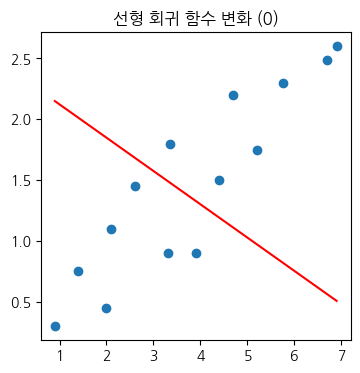

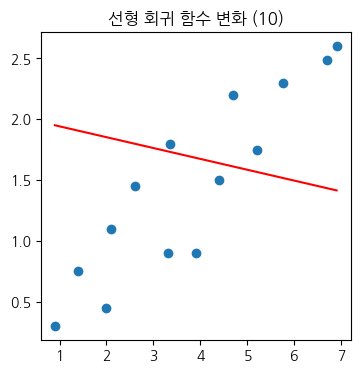

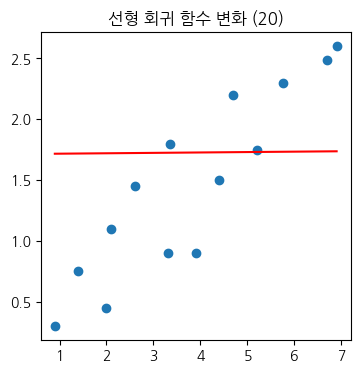

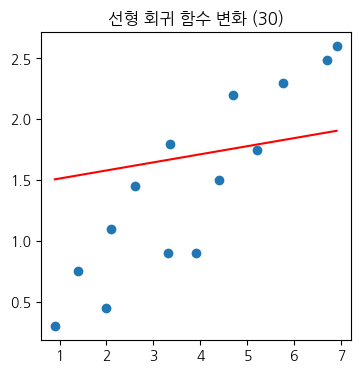

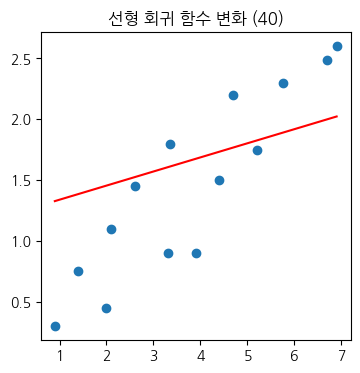

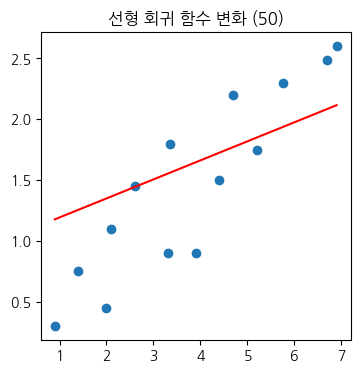

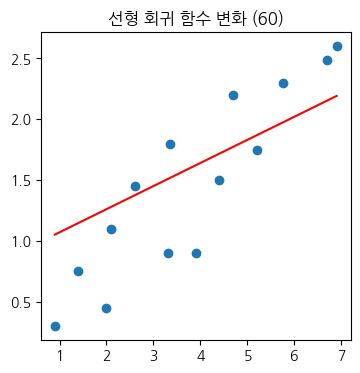

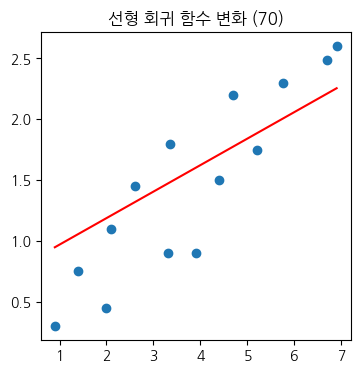

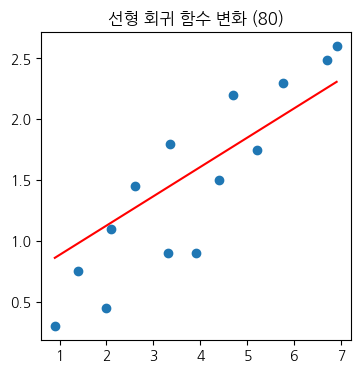

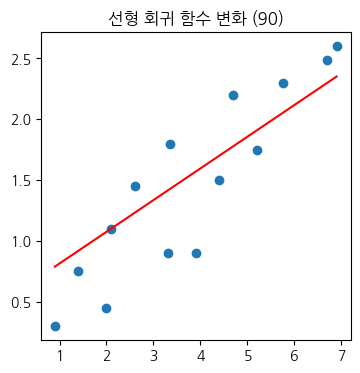

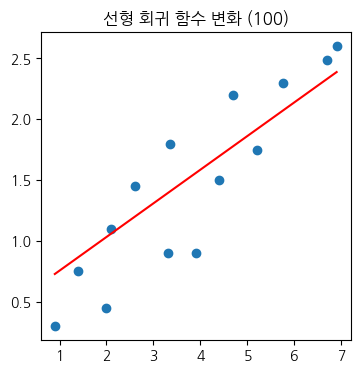

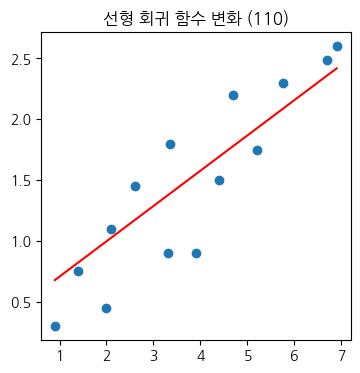

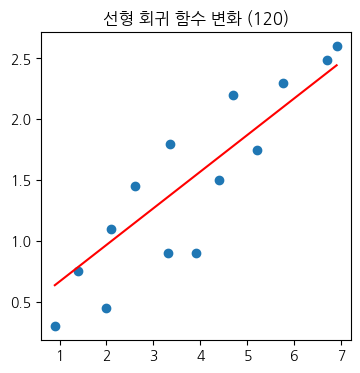

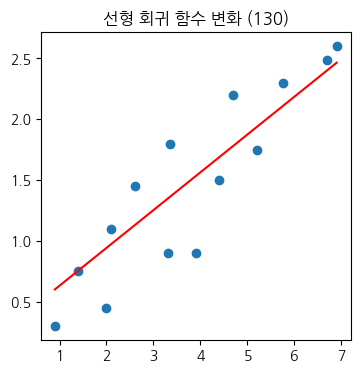

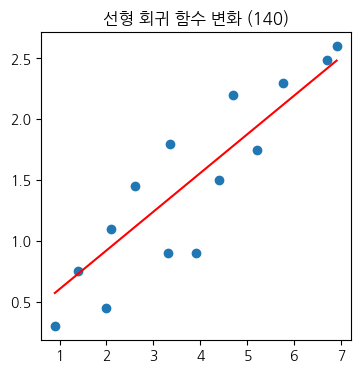

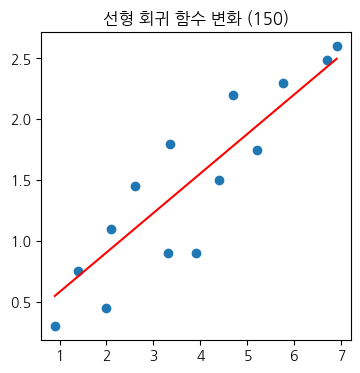

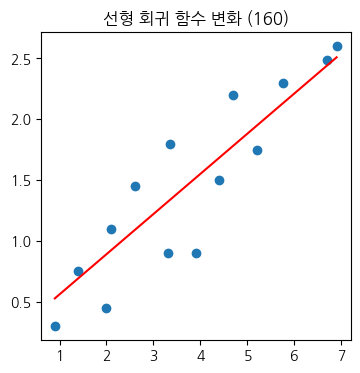

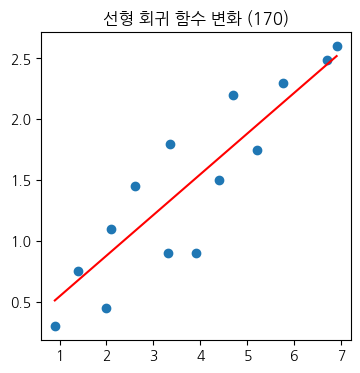

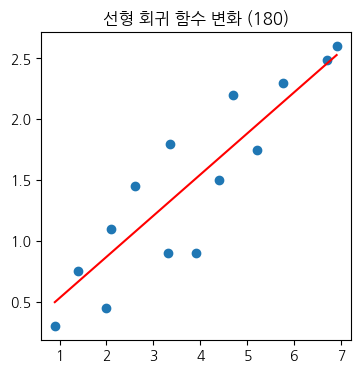

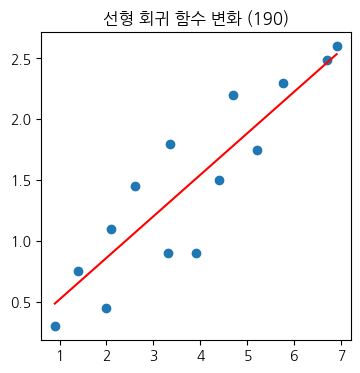

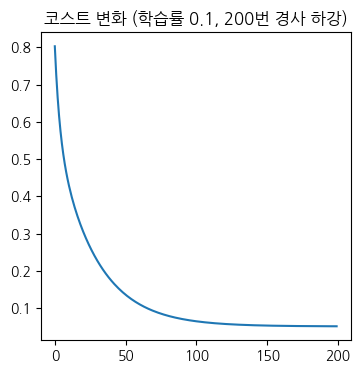

In [4]:
import numpy as np
# import matplotlib.pyplot as plt

def prediction(theta_0, theta_1, x):
    # 지난 실습의 코드를 여기에 붙여 넣으세요
    return theta_0 + theta_1 * x


def prediction_difference(theta_0, theta_1, x, y):
    # 지난 실습의 코드를 여기에 붙여 넣으세요
    p = prediction(theta_0, theta_1, x)  # 예측 값 계산
    return p - y  # 오차 계산


def gradient_descent(theta_0, theta_1, x, y, iterations, alpha):
    m = len(x)  # 입력 변수의 개수
    cost_list = []
    for i in range(iterations):  # 정해진 번만큼 경사 하강을 한다
        error = prediction_difference(theta_0, theta_1, x, y)  # 예측값들과 입력 변수들의 오차를 계산
        cost = (error@error)/ (2 * m)
        cost_list.append(cost)

        # 여기에 코드를 작성하세요
        theta_0 = theta_0 - alpha * np.mean(error)  # theta_0 업데이트
        theta_1 = theta_1 - alpha * np.mean(error * x)  # theta_1 업데이트

        if i % 10 == 0:
            plt.figure(figsize=(4, 4))
            plt.scatter(x, y)  # 현재 theta 값 시각화
            plt.plot(x, prediction(theta_0, theta_1, x), color='red')  # 현재 예측 선 시각화
            # plt.plot(house_size, prediction(theta_0, theta_1, x), color='red')  # 현재 예측 선 시각화
            plt.title(f"선형 회귀 함수 변화 ({i})")
            plt.show()

    return theta_0, theta_1, cost_list


# 입력 변수(집 크기) 초기화 (모든 집 평수 데이터를 1/10 크기로 줄임)
house_size = np.array([0.9, 1.4, 2, 2.1, 2.6, 3.3, 3.35, 3.9, 4.4, 4.7, 5.2, 5.75, 6.7, 6.9])

# 목표 변수(집 가격) 초기화 (모든 집 값 데이터를 1/10 크기로 줄임)
house_price = np.array([0.3, 0.75, 0.45, 1.1, 1.45, 0.9, 1.8, 0.9, 1.5, 2.2, 1.75, 2.3, 2.49, 2.6])

# theta 값들 초기화 (아무 값이나 시작함)
theta_0 = 2.5
theta_1 = 0

# 학습률 0.1로 200번 경사 하강
theta_0, theta_1, cost_list = gradient_descent(theta_0, theta_1, house_size, house_price, 200, 0.1)

# theta_0, theta_1
plt.figure(figsize=(4, 4))
plt.plot(cost_list)
plt.title("코스트 변화 (학습률 0.1, 200번 경사 하강)")
plt.show()

# raise ValueError("실습을 완료했습니다. 더 이상 진행하지 마세요.")


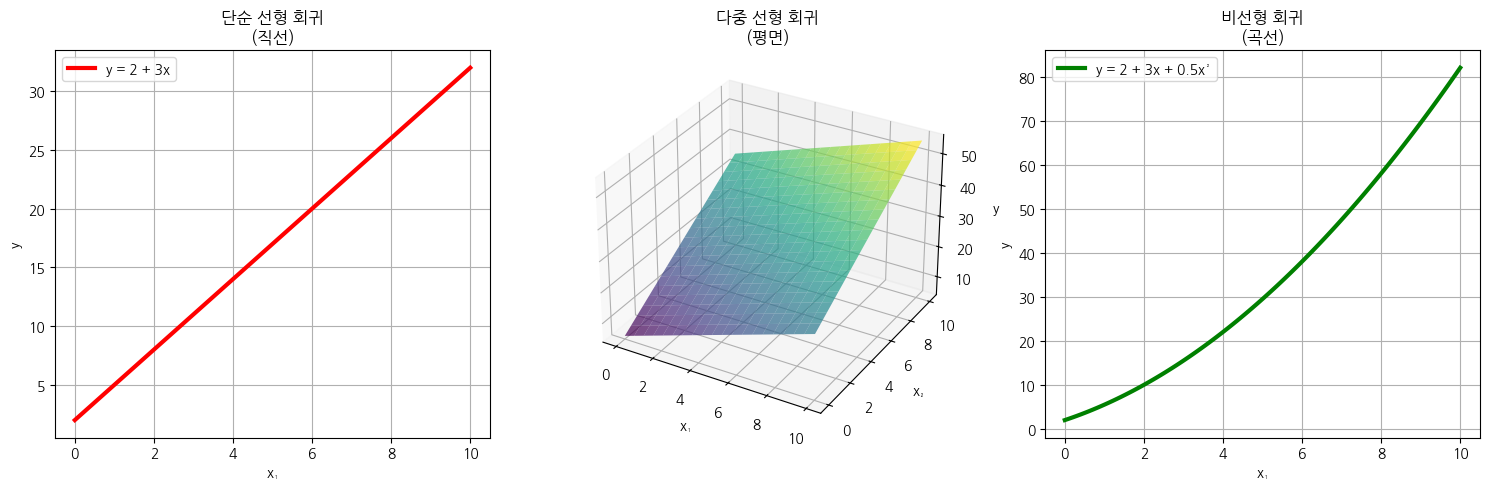

In [5]:
import numpy as np
# import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. 단순 선형 회귀 - 직선
fig = plt.figure(figsize=(15, 5))

# 2D - 직선
ax1 = fig.add_subplot(131)
x = np.linspace(0, 10, 100)
y = 2 + 3*x  # y = 2 + 3x
ax1.plot(x, y, 'r-', linewidth=3, label='y = 2 + 3x')
ax1.set_xlabel('x₁')
ax1.set_ylabel('y')
ax1.set_title('단순 선형 회귀\n(직선)')
ax1.grid(True)
ax1.legend()

# 3D - 평면
ax2 = fig.add_subplot(132, projection='3d')
x1 = np.linspace(0, 10, 20)
x2 = np.linspace(0, 10, 20)
X1, X2 = np.meshgrid(x1, x2)
Y = 5 + 2*X1 + 3*X2  # y = 5 + 2x₁ + 3x₂

ax2.plot_surface(X1, X2, Y, alpha=0.7, cmap='viridis')
ax2.set_xlabel('x₁')
ax2.set_ylabel('x₂')
ax2.set_zlabel('y')
ax2.set_title('다중 선형 회귀\n(평면)')

# 비선형 회귀 - 곡선
ax3 = fig.add_subplot(133)
x = np.linspace(0, 10, 100)
y_nonlinear = 2 + 3*x + 0.5*x**2  # y = 2 + 3x + 0.5x²
ax3.plot(x, y_nonlinear, 'g-', linewidth=3, label='y = 2 + 3x + 0.5x²')
ax3.set_xlabel('x₁')
ax3.set_ylabel('y')
ax3.set_title('비선형 회귀\n(곡선)')
ax3.grid(True)
ax3.legend()

plt.tight_layout()
plt.show()

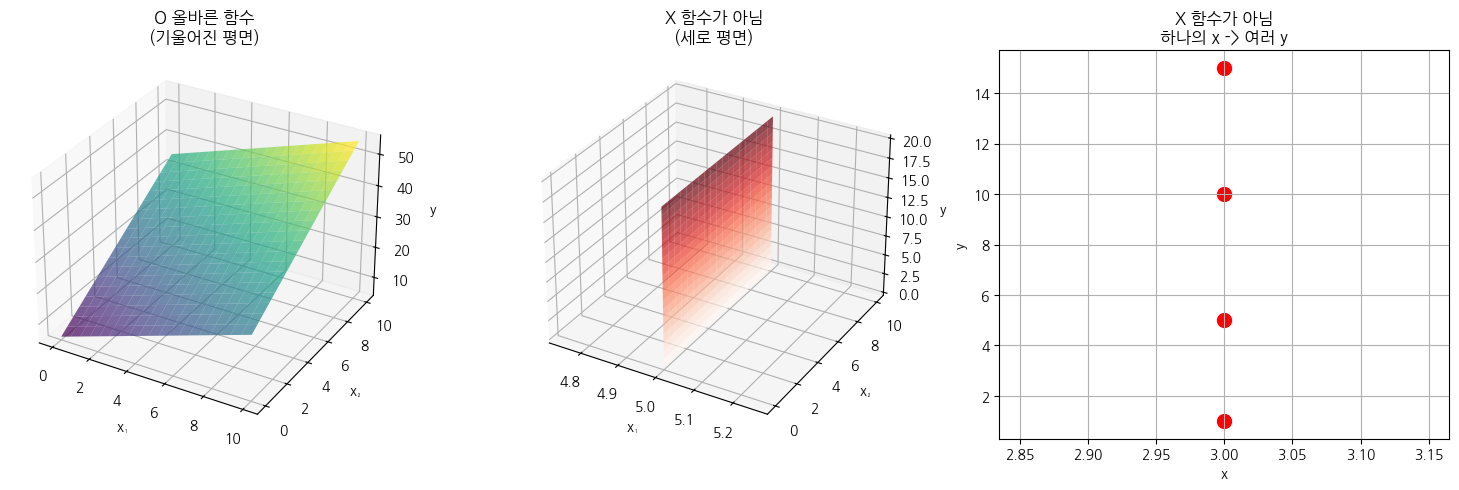

In [6]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 5))

# 1. 올바른 함수 - 기울어진 평면
ax1 = fig.add_subplot(131, projection='3d')
x1 = np.linspace(0, 10, 20)
x2 = np.linspace(0, 10, 20)
X1, X2 = np.meshgrid(x1, x2)
Y = 5 + 2*X1 + 3*X2  # 각 (x1,x2)마다 하나의 y

# 수정: x1이 아니라 ax1을 사용
ax1.plot_surface(X1, X2, Y, alpha=0.7, cmap='viridis')
ax1.set_xlabel('x₁')
ax1.set_ylabel('x₂')
ax1.set_zlabel('y')
ax1.set_title('O 올바른 함수\n(기울어진 평면)')

# 2. 잘못된 예 - Y축에 평행한 평면
ax2 = fig.add_subplot(132, projection='3d')
# x1 = 5 (상수) - 세로 평면
x1_const = np.full((20, 20), 5)
x2_range = np.linspace(0, 10, 20)
y_range = np.linspace(0, 20, 20)
X2_plane, Y_plane = np.meshgrid(x2_range, y_range)

ax2.plot_surface(x1_const, X2_plane, Y_plane, alpha=0.7, cmap='Reds')
ax2.set_xlabel('x₁')
ax2.set_ylabel('x₂')
ax2.set_zlabel('y')
ax2.set_title('X 함수가 아님\n(세로 평면)')

# 3. 함수 테스트
ax3 = fig.add_subplot(133)
x = np.array([3, 3, 3, 3])  # 같은 x값
y = np.array([1, 5, 10, 15])  # 다른 y값들

ax3.scatter(x, y, color='red', s=100)
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_title('X 함수가 아님\n하나의 x -> 여러 y')
ax3.grid(True)

plt.tight_layout()
plt.show()

## ⚖️ **3: 편향(Bias)과 분산(Variance)**

```
예측값들과 정답이 대체로 멀리 떨어져 있으면 결과의 편향(bias)이 높다고 말하고,
예측값들이 자기들끼리 대체로 멀리 흩어져있으면 결과의 분산(variance)이 높다고 말합니다.
```
https://opentutorials.org/module/3653/22071

```
 🎯 편향(Bias): 과녁의 중심에서 얼마나 멀리 떨어져 있나?
   → 모델이 정답을 체계적으로 놓치는 정도
   → 모델이 너무 단순할 때 발생 (과소적합)

📊 분산(Variance): 화살들이 얼마나 흩어져 있나?
   → 모델의 예측이 얼마나 일관성이 있는가?
   → 모델이 너무 복잡할 때 발생 (과적합)

⚖️ 목표: 편향도 낮고 분산도 낮은 모델 만들기!
   → 정확하면서도 일관된 예측을 하는 모델
```

| 상황 | 편향 | 분산 | 설명 |
|------|------|------|------|
| **정답** | 낮음 | 낮음 | 중심 근처에 모여있음 |
| **과적합** | 낮음 | 높음 | 중심 근처지만 흩어져있음 |
| **과소적합** | 높음 | 낮음 | 중심에서 멀지만 모여있음 |
| **최악** | 높음 | 높음 | 중심에서 멀고 흩어져있음 |

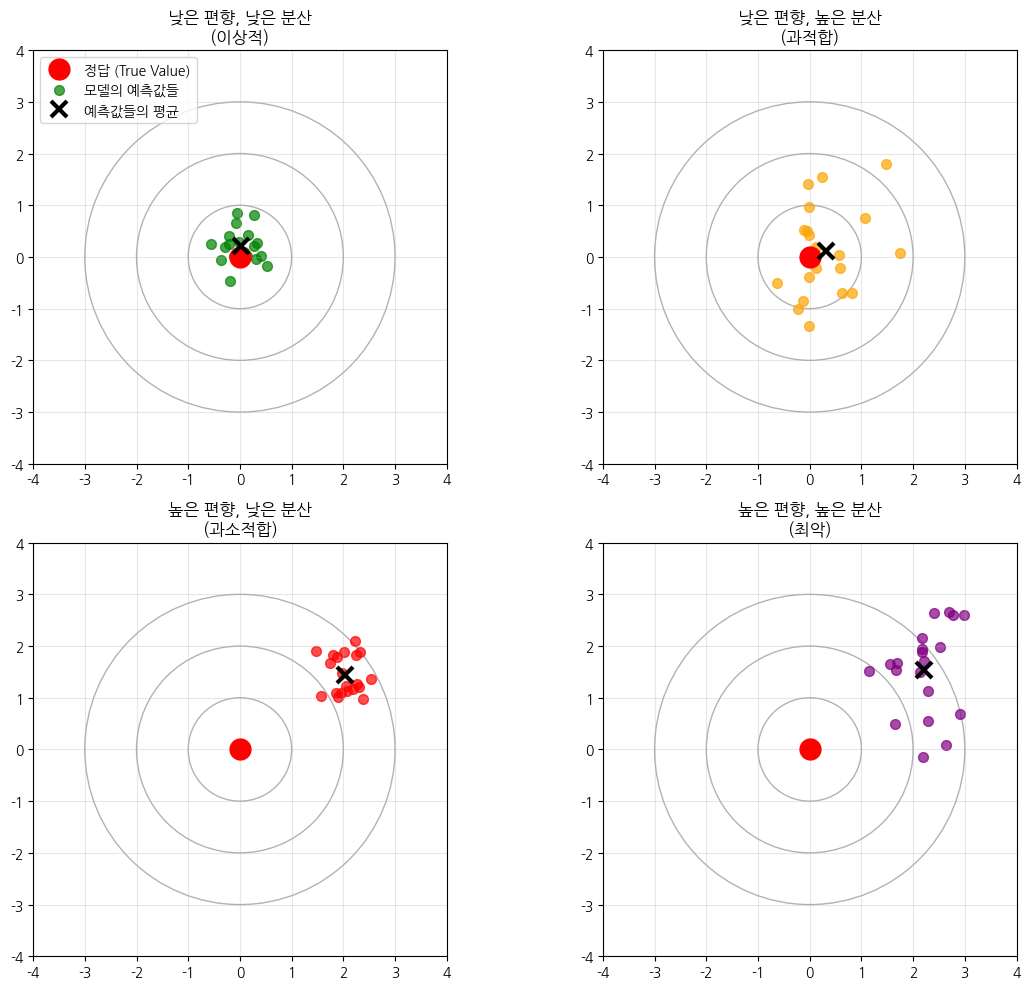

In [7]:
# 편향과 분산을 쉽게 이해하는 과녁 시각화
#import matplotlib.pyplot as plt
import numpy as np

def create_bias_variance_visualization():
    """편향과 분산을 과녁으로 쉽게 설명하는 시각화"""

    # 4가지 경우의 시나리오 설정
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # 과녁의 중심 (실제 정답)
    target_x, target_y = 0, 0

    # 각 시나리오별 데이터 생성
    scenarios = {
        '낮은 편향, 낮은 분산\n(이상적)': {
            'mean': [0.1, 0.1],
            'std': 0.3,
            'color': 'green',
            'pos': (0, 0)
        },
        '낮은 편향, 높은 분산\n(과적합)': {
            'mean': [0.1, 0.1],
            'std': 0.8,
            'color': 'orange',
            'pos': (0, 1)
        },
        '높은 편향, 낮은 분산\n(과소적합)': {
            'mean': [2.0, 1.5],
            'std': 0.3,
            'color': 'red',
            'pos': (1, 0)
        },
        '높은 편향, 높은 분산\n(최악)': {
            'mean': [2.0, 1.5],
            'std': 0.8,
            'color': 'purple',
            'pos': (1, 1)
        }
    }

    for title, params in scenarios.items():
        row, col = params['pos']
        ax = axes[row, col]

        # 과녁 그리기 (동심원)
        circles = [plt.Circle((target_x, target_y), r, fill=False, color='black', alpha=0.3)
                  for r in [1, 2, 3]]
        for circle in circles:
            ax.add_patch(circle)

        # 중심점 (정답) 표시
        ax.plot(target_x, target_y, 'ro', markersize=15, label='정답 (True Value)')

        # 예측값들 생성 및 표시
        n_predictions = 20
        predictions_x = np.random.normal(params['mean'][0], params['std'], n_predictions)
        predictions_y = np.random.normal(params['mean'][1], params['std'], n_predictions)

        ax.scatter(predictions_x, predictions_y,
                  color=params['color'], alpha=0.7, s=50,
                  label='모델의 예측값들')

        # 예측값들의 평균 표시 (편향을 보여줌)
        mean_x, mean_y = np.mean(predictions_x), np.mean(predictions_y)
        ax.plot(mean_x, mean_y, 'x', color='black', markersize=12,
                markeredgewidth=3, label='예측값들의 평균')

        # 설정
        ax.set_xlim(-4, 4)
        ax.set_ylim(-4, 4)
        ax.set_aspect('equal')
        ax.grid(True, alpha=0.3)
        ax.set_title(title, fontsize=12, fontweight='bold')

        if row == 0 and col == 0:
            ax.legend(loc='upper left', bbox_to_anchor=(0, 1))

    plt.tight_layout()
    plt.show()

# 실행
create_bias_variance_visualization()


## 🔄 **답변 4: K-폴드 교차 검증 (K-Fold Cross Validation)**

### **4-1. 교차 검증의 필요성**

#### **단순 분할의 문제점**
- **데이터 의존성**: 특정 데이터 분할에 따라 성능이 크게 달라질 수 있음
- **정보 손실**: 일부 데이터만 훈련에 사용되어 학습 기회 제한
- **편향된 평가**: 운 좋게 쉬운 테스트 세트를 만나면 과대평가 가능

#### **교차 검증의 장점**
- **안정적 평가**: 여러 번의 검증으로 더 신뢰할 수 있는 성능 추정
- **데이터 효율성**: 모든 데이터가 훈련과 검증에 모두 사용됨
- **과적합 탐지**: 훈련/검증 성능 차이로 과적합 정도 파악

### **4-2. K-폴드 교차 검증 과정**

#### **단계별 과정**
1. **데이터 분할**: 전체 데이터를 K개의 동일한 크기의 폴드로 분할
2. **반복 학습**: K번 반복하여 다음을 수행
   - (K-1)개 폴드로 모델 훈련
   - 남은 1개 폴드로 성능 평가
3. **최종 평가**: K개의 성능 점수를 평균하여 최종 성능 산출

### **4-3. K값 선택 기준**

#### **K값별 특성**

| K값 | 특징 | 장점 | 단점 | 적용 상황 |
|-----|------|------|------|-----------|
| **K=3~5** | 적은 계산량 | 빠른 실행 | 높은 분산 | 대용량 데이터 |
| **K=10** | 균형적 | 적당한 편향/분산 | 표준적 선택 | 일반적 상황 |
| **K=N** (LOOCV) | 최대 데이터 활용 | 낮은 편향 | 높은 계산비용, 높은 분산 | 소규모 데이터 |

#### **K값 선택 시 고려사항**

**1) 데이터 크기**
- **대용량** (10,000개 이상): K=3~5
- **중간** (1,000~10,000개): K=10
- **소량** (100~1,000개): K=10~20

**2) 계산 자원**
- **제한적**: 낮은 K 값
- **충분함**: 높은 K 값

**3) 클래스 불균형**
- **균형**: 표준 K-폴드
- **불균형**: Stratified K-폴드 사용

**4) 시계열 데이터**
- **시간 의존성**: Time Series Split 사용
- **독립성**: 표준 K-폴드 가능

### **4-4. 교차 검증의 변형**

#### **Stratified K-Fold**
- **목적**: 각 폴드에서 클래스 비율 유지
- **사용**: 분류 문제, 특히 불균형 데이터

#### **Leave-One-Out (LOO)**
- **정의**: K = N (전체 데이터 수)
- **특징**: 각 데이터 포인트가 한 번씩 테스트 세트가 됨

#### **Time Series Cross Validation**
- **목적**: 시간 순서 보존
- **방법**: 과거 데이터로 훈련, 미래 데이터로 검증

### **4-5. 실제 적용 시 주의사항**

#### **데이터 전처리**
- **원칙**: 각 폴드마다 독립적으로 전처리
- **이유**: 데이터 누수(Data Leakage) 방지

#### **하이퍼파라미터 튜닝**
- **네스티드 CV**: 내부 CV로 하이퍼파라미터 선택, 외부 CV로 성능 평가
- **그리드 서치**: 각 폴드에서 독립적으로 최적 파라미터 찾기

#### **성능 해석**
- **평균 성능**: 모델의 전반적 성능
- **표준편차**: 모델의 안정성 (낮을수록 좋음)
- **최대/최소**: 최악/최선 시나리오

🎯 K-폴드 교차 검증
📊 데이터: 50개 샘플
K=3: 평균 0.858 ± 0.080
K=5: 평균 0.880 ± 0.075


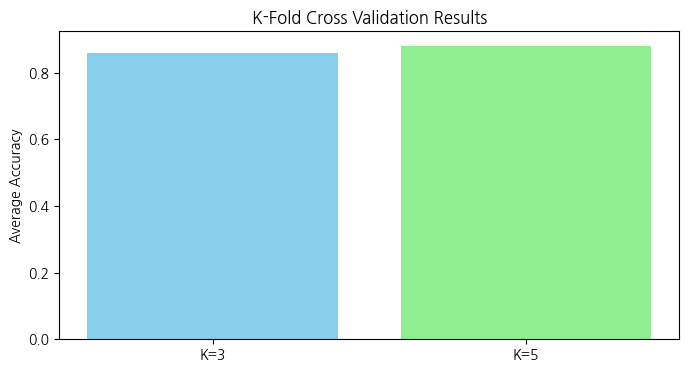


🎯 결론: K=5가 일반적으로 좋은 선택!


In [8]:
# 🔄 초보자용 K-폴드 교차 검증 실습 (더 간단!)
# import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

print("🎯 K-폴드 교차 검증")
print("=" * 50)

# 간단한 데이터 생성
X, y = make_classification(n_samples=50, n_features=5, n_informative=3,
                          n_redundant=1, n_classes=2, random_state=42)
print(f"📊 데이터: {X.shape[0]}개 샘플")

# 간단한 모델
model = LogisticRegression(random_state=42, max_iter=500)

# K값별 테스트
k_values = [3, 5]  # 더 줄임
results = []

for k in k_values:
    scores = cross_val_score(model, X, y, cv=k)
    avg_score = scores.mean()
    std_score = scores.std()

    results.append([k, avg_score, std_score])
    print(f"K={k}: 평균 {avg_score:.3f} ± {std_score:.3f}")

# 간단한 막대 그래프
plt.figure(figsize=(8, 4))
k_vals = [r[0] for r in results]
avg_scores = [r[1] for r in results]

plt.bar(range(len(k_vals)), avg_scores, color=['skyblue', 'lightgreen'])
plt.xticks(range(len(k_vals)), [f'K={k}' for k in k_vals])
plt.ylabel('Average Accuracy')
plt.title('K-Fold Cross Validation Results')
plt.show()

print("\n🎯 결론: K=5가 일반적으로 좋은 선택!")